In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,Embedding,LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np


Input data and preprocessing

In [3]:
tokenizer=Tokenizer()

data='''
You’re glowing
You colour and fracture the light
You can’t help but shine
And I know that
You carry the world on your back
But look at you tonight
The lights, your face, your eyes
Exploding like fireworks in the sky
Sapphire
Touching on your body while you’re pushing on me
Don’t you end the party, I could do this all week
We’ll be dancing till the morning, go to bed, we won’t sleep
Cham-Cham Chamke Sitaare Vargi (Sapphire)
Look what we found, Karma reached out
Into our hearts and pulled us to our feet now
You know, the truth is we could disappear
Anywhere, as long as I got you there
When the sun dies, till the day shines
When I’m with you, there’s not enough time
You are my spring flower, watching you bloom, wow
We are surrounded, but I can only see
The lights, your face, your eyes
Exploding like fireworks in the sky
Sapphire
Touching on your body while you’re pushing on me
Don’t you end the party, I could do this all week
We’ll be dancin’ till the morning, go to bed, we won’t sleep
Cham-Cham Chamke Sitaare Vargi (Sapphire)
Mahurani Do Nain Lubhaye
Chandni Cham Cham Chamkaye (You’re glowing)
Noor Da Mainu Ghunt Pilaye
Jindri Ban Jaye
You’re glowing
You colour and fracture the light
Look at you tonight
Sapphire
Palkaan Uthavate Hanere Ghatde
Ungla Ch Pake Tu Dhanak Phirdi
Kive Rabb Ne Do Naina Ute Neelam Jare
Cham-Cham Chamke Sitaare Vargi (Sapphire)
Touching on your body while you’re pushing on me
Don’t you end the party, I could do this all week
We’ll be dancing till the morning, go to bed, we won’t sleep
Cham-Cham Chamke Sitaare Vargi (Sapphire)
Touching on your body while you’re pushing on me (The lights, your face, your eyes)
Don’t you end the party, I could do this all week (Exploding)
We’ll be dancing till the morning, go to bed, we won’t sleep (Like fireworks in the sky)
Cham-Cham Chamke Sitaare Vargi (Sapphire)
The lights, your face, your eyes
Exploding like fireworks in the sky
Sapphire

'''

In [4]:
corpus = data.lower().split()

In [5]:
print(corpus)

['you’re', 'glowing', 'you', 'colour', 'and', 'fracture', 'the', 'light', 'you', 'can’t', 'help', 'but', 'shine', 'and', 'i', 'know', 'that', 'you', 'carry', 'the', 'world', 'on', 'your', 'back', 'but', 'look', 'at', 'you', 'tonight', 'the', 'lights,', 'your', 'face,', 'your', 'eyes', 'exploding', 'like', 'fireworks', 'in', 'the', 'sky', 'sapphire', 'touching', 'on', 'your', 'body', 'while', 'you’re', 'pushing', 'on', 'me', 'don’t', 'you', 'end', 'the', 'party,', 'i', 'could', 'do', 'this', 'all', 'week', 'we’ll', 'be', 'dancing', 'till', 'the', 'morning,', 'go', 'to', 'bed,', 'we', 'won’t', 'sleep', 'cham-cham', 'chamke', 'sitaare', 'vargi', '(sapphire)', 'look', 'what', 'we', 'found,', 'karma', 'reached', 'out', 'into', 'our', 'hearts', 'and', 'pulled', 'us', 'to', 'our', 'feet', 'now', 'you', 'know,', 'the', 'truth', 'is', 'we', 'could', 'disappear', 'anywhere,', 'as', 'long', 'as', 'i', 'got', 'you', 'there', 'when', 'the', 'sun', 'dies,', 'till', 'the', 'day', 'shines', 'when', 'i

In [6]:
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'you': 2, 'your': 3, 'cham': 4, 'on': 5, 'sapphire': 6, 'you’re': 7, 'i': 8, 'we': 9, 'do': 10, 'could': 11, 'till': 12, 'to': 13, 'chamke': 14, 'sitaare': 15, 'vargi': 16, 'and': 17, 'lights': 18, 'face': 19, 'eyes': 20, 'exploding': 21, 'like': 22, 'fireworks': 23, 'in': 24, 'sky': 25, 'touching': 26, 'body': 27, 'while': 28, 'pushing': 29, 'me': 30, 'don’t': 31, 'end': 32, 'party': 33, 'this': 34, 'all': 35, 'week': 36, 'we’ll': 37, 'be': 38, 'morning': 39, 'go': 40, 'bed': 41, 'won’t': 42, 'sleep': 43, 'glowing': 44, 'but': 45, 'look': 46, 'dancing': 47, 'colour': 48, 'fracture': 49, 'light': 50, 'know': 51, 'at': 52, 'tonight': 53, 'our': 54, 'as': 55, 'when': 56, 'are': 57, 'can’t': 58, 'help': 59, 'shine': 60, 'that': 61, 'carry': 62, 'world': 63, 'back': 64, 'what': 65, 'found': 66, 'karma': 67, 'reached': 68, 'out': 69, 'into': 70, 'hearts': 71, 'pulled': 72, 'us': 73, 'feet': 74, 'now': 75, 'truth': 76, 'is': 77, 'disappear': 78, 'anywhere': 79, 'long': 80, 'got': 

In [7]:
token_list = tokenizer.texts_to_sequences([data])[0]
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))  # index → word mapping

input_seq = []
for i in range(1, len(token_list)):
    n_gram_sequence = token_list[max(0, i-5):i+1]
    # words = [reverse_word_map[idx] for idx in n_gram_sequence]  # convert indices to words
    # print(words)  # print the actual words
    input_seq.append(n_gram_sequence)


In [8]:
import pickle

# save the tokenizer to a file
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [9]:
import pickle

# save the tokenizer to a file
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [10]:
from tensorflow.keras.utils import pad_sequences

In [11]:
# pad sequence
max_seq_len=max([len(x) for x in input_seq])
input_sequences = np.array(pad_sequences(input_seq, maxlen=max_seq_len,padding='pre'))

In [12]:
max_seq_len

6

In [13]:
print(input_sequences)

[[ 0  0  0  0  7 44]
 [ 0  0  0  7 44  2]
 [ 0  0  7 44  2 48]
 ...
 [20 21 22 23 24  1]
 [21 22 23 24  1 25]
 [22 23 24  1 25  6]]


In [14]:
X,labels=input_sequences[:,:-1],input_sequences[:,-1:]

y=tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [15]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Model creation

In [16]:
# Define early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20,min_delta=0.0001, restore_best_weights=True)

In [17]:
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(20,return_sequences=True)))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 100)            13400     
                                                                 
 bidirectional (Bidirection  (None, 5, 40)             19360     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 40)             0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 134)               13534     
                                                                 
Total params: 102694 (401.15 KB)
Trainable params: 102694 (401.15 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [18]:
history=model.fit(X,y,epochs=80,verbose=1)

Epoch 1/80


11/11 [==============================] - 21s 33ms/step - loss: 4.8945 - accuracy: 0.0455
Epoch 2/80
11/11 [==============================] - 0s 25ms/step - loss: 4.8761 - accuracy: 0.0597
Epoch 3/80
11/11 [==============================] - 0s 22ms/step - loss: 4.8226 - accuracy: 0.0767
Epoch 4/80
11/11 [==============================] - 0s 24ms/step - loss: 4.6034 - accuracy: 0.0455
Epoch 5/80
11/11 [==============================] - 0s 27ms/step - loss: 4.3921 - accuracy: 0.0682
Epoch 6/80
11/11 [==============================] - 0s 25ms/step - loss: 4.2548 - accuracy: 0.0682
Epoch 7/80
11/11 [==============================] - 0s 24ms/step - loss: 4.1304 - accuracy: 0.0625
Epoch 8/80
11/11 [==============================] - 0s 28ms/step - loss: 3.9713 - accuracy: 0.1023
Epoch 9/80
11/11 [==============================] - 0s 25ms/step - loss: 3.7533 - accuracy: 0.1364
Epoch 10/80
11/11 [==============================] - 0s 26ms/step - loss: 3.5255 - accuracy: 0.1477
Epoch 

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

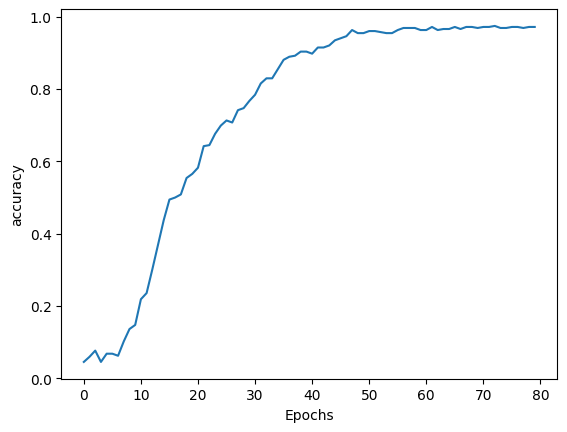

In [20]:
plot_graphs(history,'accuracy')

prediction

In [21]:
model.save("lyrics_saphire.keras")

In [22]:
def wordpred(seed_text,next_word):
  for _ in range(next_word):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]
    token_list=pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')
    predicted=np.argmax(model.predict(token_list,verbose=0))
    output_word=""
    for word, index in tokenizer.word_index.items():
      if index==predicted:
        output_word=word
        break
    seed_text+=" "+output_word
  print(seed_text)

In [25]:
wordpred("pushing on your body",10)

pushing on your body you’re on pushing on me don’t the lights your face
